Say h(x) = sigmoid(θ^T x)

L(θ) = ∑_i ( −y_i log(h(x_i)) − (1−y_i) log(1−h(x_i)) )

SGD Step co-ord wise: θ_j = θ_j − α(h(x_i)−y_i)x_i^j
Full Gradient matrix form: ▽_θ L(θ) = 1/m ∑_i (h(x_i)−y_i) x_i

Newton Step: 
    H = 1/m ∑_i { h(x_i)(1−h(x_i)) x_i x_i^T }
    θ = θ− H^(−1) ▽_θ L(θ)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

#we read data from files line by line
init = False
file = open('logistic_x.txt', 'rb')
for row in file:
    r = row.decode('utf8').strip().split(' ')
    if(init == False):
        x_train = np.array([[1], [np.float(r[0])], [np.float(r[len(r)-1])]])
        init = True
    else:
        x_train = np.append(x_train, [[1], [np.float(r[0])], [np.float(r[len(r)-1])]], axis=1);
init = False
file = open('logistic_y.txt', 'rb')
for row in file:
    if(init == False):
        y_train = np.array([[np.float(row.strip())]])
        init = True
    else:
        y_train = np.append(y_train, [[np.float(row.strip())]], axis=1);
#number of training examples
m = y_train.shape[1]
#init theta
theta = np.array(np.zeros((x_train.shape[0], 1)))

#sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

#we find all indices that make y=1 and y=0
pos = np.flatnonzero(y_train == 1)
neg = np.flatnonzero(y_train == 0)

#plot data points
plt.plot(x_train[1, pos], x_train[2, pos], 'ro')
plt.plot(x_train[1, neg], x_train[2, neg], 'bo')    
    
x = 0
xT = x_train.T
yT = y_train.T
preJ = 0
while True:
    J = 0
    x = x + 1;
    for i in range(0, m):
        #calculate h, error, cost function for 1 training example
        h = sigmoid(theta.T.dot(x_train[:,i].T))
        error = h.T - yT[i]
        tmp = (-1)*yT[i]*np.log(h) - (1-yT[i])*np.log((1-h))
        #accumulate cost function
        J = J + tmp
        nX = np.array([x_train[:,i]]).T
        #update theta
        theta = theta - 0.000003*(error*nX)
    J=J/m
    #just print cost function for every 1000steps
    if(x == 1000):
        x = 0
        print(J)
    if(preJ == 0):
        preJ = J
    #condition to stop learning when cost function do not decrease anymore
    if((preJ) < (J)):
        break
    else:
        preJ = J
#we got theta
print(theta)

#plot the line that separate data poits
plot_x = [np.ndarray.min(x_train[1:]), np.ndarray.max(x_train[1:])]
plot_y = np.subtract(np.multiply(-(theta[2][0]/theta[1][0]), plot_x), theta[0][0]/theta[1][0])
plt.plot(plot_x, plot_y, 'b-')

plt.show()

[0.66562014]
[0.66518165]
[0.66473473]
[0.66428829]
[0.66384282]
[0.66339833]
[0.66295481]
[0.66251226]
[0.66207069]
[0.66163008]
[0.66119044]
[0.66075177]
[0.66031406]
[0.6598773]
[0.65944151]
[0.65900667]
[0.65857279]
[0.65813985]
[0.65770787]
[0.65727683]
[0.65684674]
[0.6564176]
[0.65598939]
[0.65556212]
[0.65513579]
[0.6547104]
[0.65428593]
[0.6538624]
[0.6534398]
[0.65301812]
[0.65259737]
[0.65217754]
[0.65175863]
[0.65134064]
[0.65092356]
[0.6505074]
[0.65009215]
[0.64967781]
[0.64926438]
[0.64885186]
[0.64844023]
[0.64802951]
[0.64761969]
[0.64721077]
[0.64680274]
[0.64639561]
[0.64598937]
[0.64558402]
[0.64517955]
[0.64477597]
[0.64437327]
[0.64397146]
[0.64357052]
[0.64317046]
[0.64277128]
[0.64237297]
[0.64197553]
[0.64157896]
[0.64118326]
[0.64078842]
[0.64039445]
[0.64000134]
[0.63960909]
[0.63921769]
[0.63882715]
[0.63843746]
[0.63804863]
[0.63766064]
[0.6372735]
[0.63688721]
[0.63650176]
[0.63611715]
[0.63573338]
[0.63535044]
[0.63496835]
[0.63458708]
[0.63420665]
[0.633

0.6931471805599453
0.4409414251174163
0.40889169253305696
0.40551077605901753
0.40544745391660425
0.4054474249282527
0.4054474249282463
0.4054474249282463
0.4054474249282462
0.4054474249282462
[[-16.37874341]
 [  0.14834077]
 [  0.15890845]]


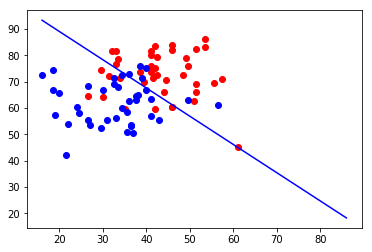

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

init = False
file = open('logistic_x.txt', 'rb')
for row in file:
    r = row.decode('utf8').strip().split(' ')
    if(init == False):
        x_train = np.array([[1], [np.float(r[0])], [np.float(r[len(r)-1])]])
        init = True
    else:
        x_train = np.append(x_train, [[1], [np.float(r[0])], [np.float(r[len(r)-1])]], axis=1);
init = False
file = open('logistic_y.txt', 'rb')
for row in file:
    if(init == False):
        y_train = np.array([[np.float(row.strip())]])
        init = True
    else:
        y_train = np.append(y_train, [[np.float(row.strip())]], axis=1);

m = y_train.shape[1]
theta = np.zeros((x_train.shape[0], 1))


def sigmoid(z):
 return 1/(1+np.exp(-z))

pos = np.flatnonzero(y_train == 1)
neg = np.flatnonzero(y_train == 0)

plt.plot(x_train[1, pos], x_train[2, pos], 'ro')
plt.plot(x_train[1, neg], x_train[2, neg], 'bo')  

yT = y_train.T
xT = x_train.T
#iterator 500 steps
for x in range(0, 10):
    h = sigmoid(theta.T.dot(x_train))
    error = h - y_train
    tmp = (-1)*y_train*np.log(h) - (1-y_train)*np.log((1-h))
    J = np.sum(tmp)/m;
    #calculate H
    H = (h*(1-h)*(x_train)).dot(x_train.T)/m
    #calculate dJ
    dJ = np.sum(error*x_train, axis=1)/m
    #gradient = H-1.dJ
    grad = inv(H).dot(dJ)
    #update theta
    theta = theta - (np.array([grad])).T
    print(J)
    
print(theta)

plot_x = [np.ndarray.min(x_train[1:]), np.ndarray.max(x_train[1:])]
plot_y = np.subtract(np.multiply(-(theta[2][0]/theta[1][0]), plot_x), theta[0][0]/theta[1][0])
plt.plot(plot_x, plot_y, 'b-')

plt.show()